In [54]:
#import dependencies
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [55]:
#declare csv's and read into pandas DF(Extract data)
csv_file_happy = "Happiness_2016.csv"
csv_file_free = "Freedom_2016.csv"
csv_file_expectancy = "Life Expectancy Data.csv"
csv_file_final = "Final_data1.csv"
happiness_df = pd.read_csv(csv_file_happy)
freedom_df = pd.read_csv(csv_file_free)
map_df = pd.read_csv(csv_file_final)
#Transform data by cleaning into new df's with desired columns only
happy_summary = happiness_df[['Country', 'Economy (GDP per Capita)', 'Family', 'Generosity', 'Happiness Score']]
happy_rename_pk = happy_summary.rename(columns={'Country': 'country', 'Economy (GDP per Capita)': 'GDP_per_Capita', 'Happiness Score': 'Happiness_Score'})
happy_rename_pk.head()

,country,GDP_per_Capita,Family,Generosity,Happiness_Score
0,Denmark,1.44178,1.16374,0.36171,7.526
1,Switzerland,1.52733,1.14524,0.28083,7.509
2,Iceland,1.42666,1.18326,0.47678,7.501
3,Norway,1.57744,1.12690,0.37895,7.498
4,Finland,1.40598,1.13464,0.25492,7.413


In [56]:
expectancy_df = pd.read_csv(csv_file_expectancy)
expectancy_df.columns.tolist()
expectancy_rename = expectancy_df.rename(columns={'Country': 'country', 'Life Expectancy ': 'Life_Expectancy', 'Measles ': 'Measles',
                                                 'under-five deaths ': 'under_5_deaths', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS',
                                                 ' thinness  1-19 years': 'thinness 1-19 yrs', ' thinness 5-9 years': 'thinness 5-9 yrs'})
expectancy_summary = expectancy_rename[['country', 'Status', 'Life_Expectancy', 'under_5_deaths', 'bmi']]
expectancy_summary.head()

,country,Status,Life_Expectancy,under_5_deaths,bmi
0,Afghanistan,Developing,65.0,83,19.1
1,Albania,Developing,77.8,0,58.0
2,Algeria,Developing,75.6,24,59.5
3,Angola,Developing,52.4,98,23.3
4,Antigua and Barbuda,Developing,76.4,0,47.7


In [57]:
#pull necessary columns and filter by relevant year for comparison to happiness
freedom_summary = freedom_df[['year', 'countries', 'ECONOMIC FREEDOM']]
freedom_rename_pk = freedom_summary.rename(columns={'countries': 'country', 'ECONOMIC FREEDOM': 'Economic_Freedom'})
freedom_2016 = freedom_rename_pk[['country', 'Economic_Freedom']]
freedom_2016.head()

,country,Economic_Freedom
0,Hong Kong,8.97
1,Singapore,8.84
2,New Zealand,8.49
3,Switzerland,8.39
4,Ireland,8.07


In [58]:
freedom_merge = pd.merge(freedom_2016, happy_rename_pk, how="outer", on=["country"])
freedom_merge.head()

,country,Economic_Freedom,GDP_per_Capita,Family,Generosity,Happiness_Score
0,Hong Kong,8.97,1.51070,0.87021,0.40097,5.458
1,Singapore,8.84,1.64555,0.86758,0.32706,6.739
2,New Zealand,8.49,1.36066,1.17278,0.49401,7.334
3,Switzerland,8.39,1.52733,1.14524,0.28083,7.509
4,Ireland,8.07,1.48341,1.16157,0.44963,6.907


In [59]:
expectancy_merge = pd.merge(freedom_merge, expectancy_summary, how="outer", on=["country"])
expectancy_clean = expectancy_merge.round(1).dropna()
expectancy_clean.head()

,country,Economic_Freedom,GDP_per_Capita,Family,Generosity,Happiness_Score,Status,Life_Expectancy,under_5_deaths,bmi
1,Singapore,8.8,1.6,0.9,0.3,6.7,Developed,83.1,0.0,33.2
2,New Zealand,8.5,1.4,1.2,0.5,7.3,Developed,81.6,0.0,67.5
3,Switzerland,8.4,1.5,1.1,0.3,7.5,Developed,83.4,0.0,57.4
4,Ireland,8.1,1.5,1.2,0.4,6.9,Developed,81.4,0.0,62.8
6,Georgia,8.0,0.8,0.2,0.1,4.3,Developing,74.4,1.0,56.2


In [60]:
#pull updated file for map graph
map_df.head()

,country,code,Status,Life Expectancy,Adult Mortality,bmi,ECONOMIC FREEDOM,GDP per Capita,Family,Generosity,Happiness Score,code_lower
0,Albania,AL,Developing,77.8,74,58.0,7.5,1.0,0.5,0.2,4.7,al
1,Algeria,DZ,Developing,75.6,19,59.5,5.0,1.1,0.8,0.1,6.4,dz
2,Angola,AO,Developing,52.4,335,23.3,5.2,0.8,0.7,0.1,3.9,ao
3,Argentina,AR,Developing,76.3,116,62.8,4.8,1.2,1.1,0.1,6.6,ar
4,Armenia,AM,Developing,74.8,118,54.9,7.6,0.9,0.6,0.1,4.4,am


In [61]:
sorted_df = map_df.sort_values(by='Happiness Score', ascending=False)
renamed_df = sorted_df.rename(columns={'Life Expectancy': 'life_expectancy', 'ECONOMIC FREEDOM': 'economic_freedom', 'Happiness Score': 'happiness_score'})
renamed_df.head()

,country,code,Status,life_expectancy,Adult Mortality,bmi,economic_freedom,GDP per Capita,Family,Generosity,happiness_score,code_lower
109,Switzerland,CH,Developed,83.4,49,57.4,8.4,1.5,1.1,0.3,7.5,ch
31,Denmark,DK,Developed,86.0,71,58.8,7.8,1.4,1.2,0.4,7.5,dk
87,Norway,NO,Developed,81.8,59,61.2,7.6,1.6,1.1,0.4,7.5,no
49,Iceland,IS,Developed,82.7,49,61.0,7.2,1.4,1.2,0.5,7.5,is
23,Canada,CA,Developing,82.2,64,67.0,8.0,1.4,1.1,0.4,7.4,ca


In [68]:
disk_engine = create_engine('sqlite:///happiness_db.db')
renamed_df.to_sql('happiness_database', disk_engine, if_exists='append')

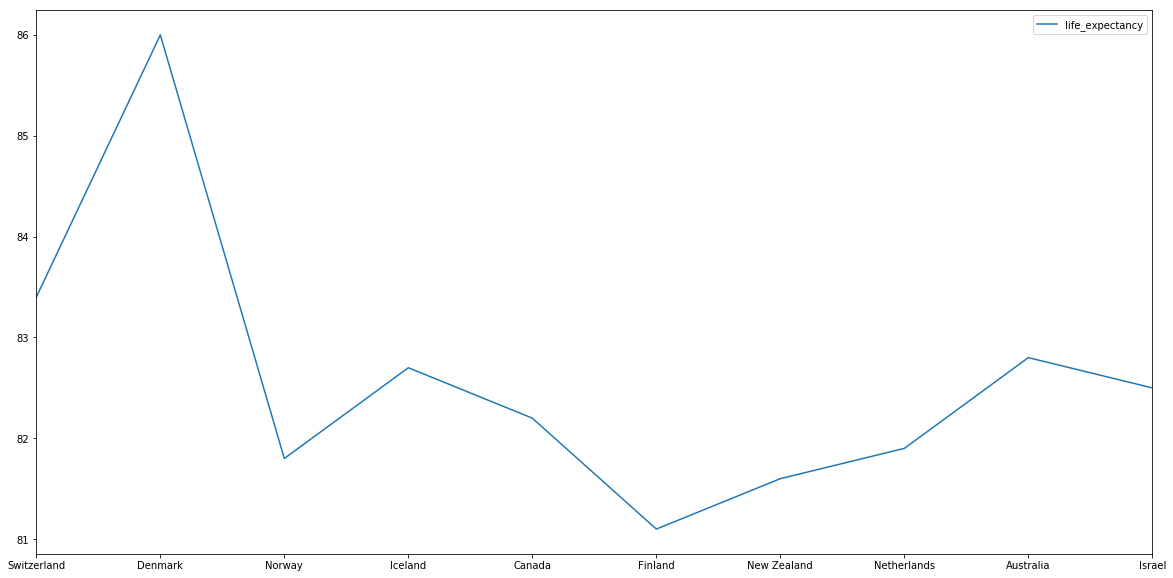

In [127]:
most_happy_df = pd.read_sql_query('SELECT country, life_expectancy  FROM happiness_database LIMIT 10', disk_engine)
least_happy_df = pd.read_sql_query('SELECT country, life_expectancy FROM happiness_database LIMIT 110,10', disk_engine)

happy_plot = most_happy_df.plot(kind="line", figsize=(20,10))
happy_plot.set_xticklabels(renamed_df["country"])
plt.savefig("./images/top_10_happy_countries")

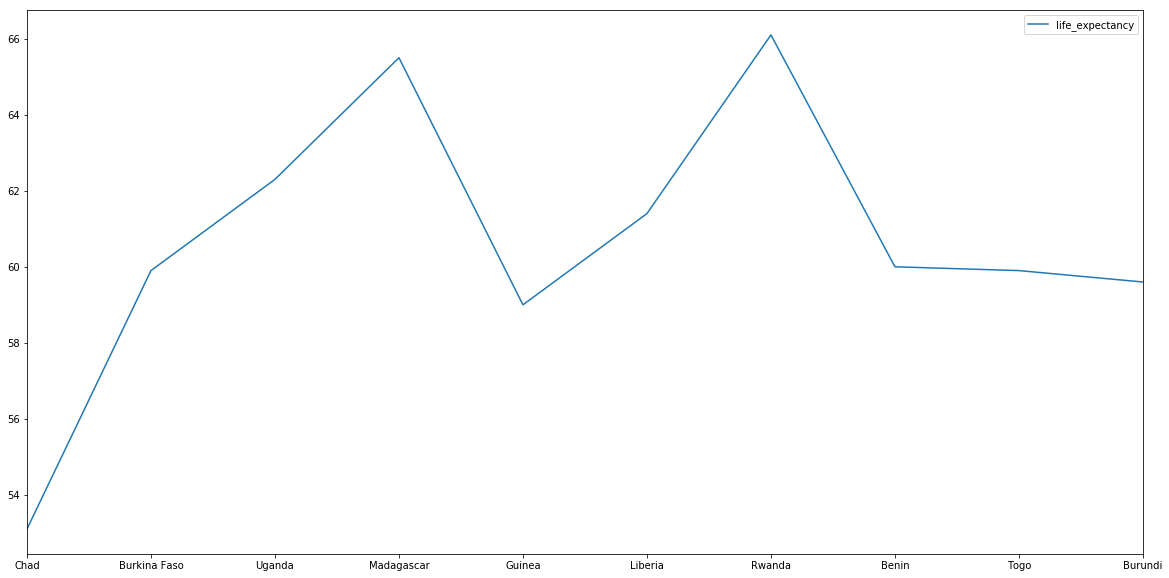

In [128]:
least_happy_plot = least_happy_df.plot(kind="line", figsize=(20,10))
least_happy_plot.set_xticklabels(least_happy_df["country"])
plt.savefig("./images/lowest_10_happy_countries")

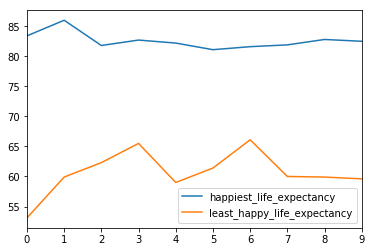

In [129]:
rename_most_happy = most_happy_df.rename(columns={'life_expectancy': 'happiest_life_expectancy'})
rename_least_happy = least_happy_df.rename(columns={'life_expectancy': 'least_happy_life_expectancy'})
ax = rename_most_happy.plot()
rename_least_happy.plot(ax=ax)
plt.savefig("./images/life_expectancy_comparison")

In [126]:
developed_df = pd.read_sql_query('SELECT Status, happiness_score, life_expectancy, bmi FROM happiness_database', disk_engine)
# developing_df = pd.read_sql_query('SELECT Status, life_expectancy, bmi FROM happiness_database WHERE Status == "Developing"', disk_engine)
comparison_df = developed_df.groupby(["Status"])
average_df = comparison_df.mean()
average_df

,happiness_score,life_expectancy,bmi
Status,,,
Developed,6.407143,80.953571,54.428571
Developing,5.126087,70.363043,40.071739


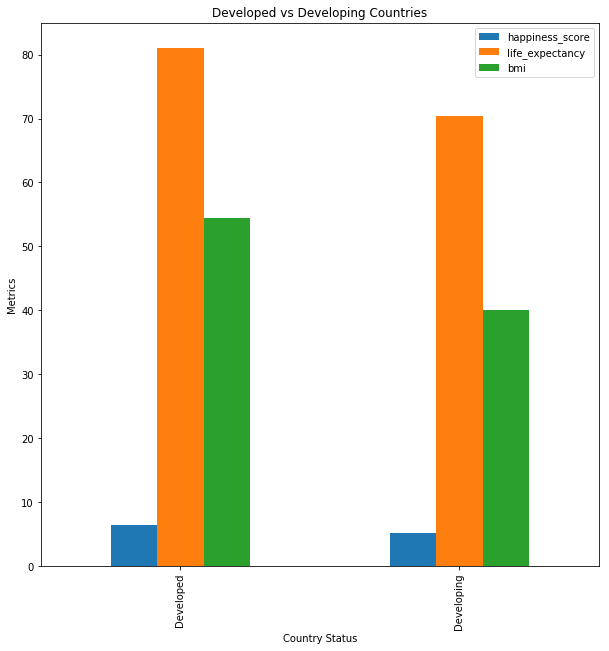

In [130]:
status_plot = average_df.plot(kind="bar", title="Developed vs Developing Countries", figsize=(10,10))
status_plot.set_xlabel("Country Status")
status_plot.set_ylabel("Metrics")
plt.savefig("./images/country_status_comparison")
plt.show()